In [113]:
import sys

import matplotlib.pyplot as plt
import json

import numpy as np
import pandas as pd

# import dysts
# from dysts.flows import *
from dysts.base import *
# from dysts.utils import *
# from dysts.analysis import *

# try:
#     from private.lyap import lyap_r, lyap_e, corr_dim
# except:
#     from nolds import lyap_r, lyap_e, corr_dim



import degas as dg
dg.set_style()

import seaborn as sns
sns.set_style()

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import dysts.flows

attributes =  ['maximum_lyapunov_estimated', 'kaplan_yorke_dimension', 'multiscale_entropy', 'correlation_dimension']
all_properties = dict()
for equation_name in get_attractor_list():
    eq = getattr(dysts.flows, equation_name)()
    attr_vals = [getattr(eq, item, None) for item in attributes]
    
    all_properties[equation_name] = dict(zip(attributes, attr_vals))
    
all_properties = pd.DataFrame(all_properties).transpose().dropna()

In [6]:
# get data
with open("results/symbolic_scores_sweep.json", "r") as file:
    data = json.load(file)
    
data = pd.DataFrame(data).transpose()
data_reduced = data[["pySR", "DSR", "SINDY-poly", "SINDY-fourier" ]]

## print timing information
print(data[["pySR-time", "DSR-time", "SINDY-poly-time", "SINDY-fourier-time"]].median())
print(1.253 * data[["pySR-time", "DSR-time", "SINDY-poly-time", "SINDY-fourier-time"]].sem())

pySR-time             1405.186874
DSR-time              4332.729651
SINDY-poly-time          0.012598
SINDY-fourier-time       0.013998
dtype: float64
pySR-time              58.078007
DSR-time              248.490689
SINDY-poly-time         0.012836
SINDY-fourier-time      0.002041
dtype: float64


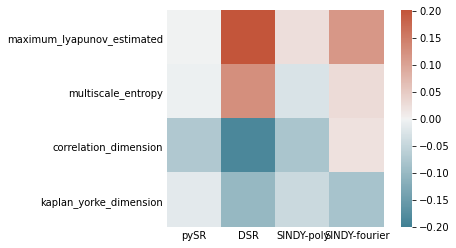

In [36]:


cross_corr = pd.concat([data_reduced , all_properties], axis=1, keys=['data_reduced', 'all_properties']).corr(method="spearman").loc['data_reduced', 'all_properties']
math_sort_inds = np.argsort(np.max(cross_corr, axis=0))[::-1]

vspan = np.max(np.abs(np.array(cross_corr)))
ax = sns.heatmap(cross_corr.transpose().iloc[math_sort_inds, :], cmap=sns.diverging_palette(220, 20, as_cmap=True), vmin=-vspan, vmax=vspan)
ax.set_aspect(1)
ax.tick_params(axis='both', which='both', length=0)

# dg.better_savefig("../private_writing/fig_resources/symbolic_metric_correlations.png", dpi=600)

### Make violin plots

In [90]:
model_names = ['pySR', 'DSR', 'SINDY-poly', 'SINDY-fourier']


def mirror_df(df, mirror_val=0):
    """
    Create a mirrored augmented dataframe. Used
    for setting the right boundary conditions on kernel 
    density plots
    """
    return pd.concat([df, mirror_val - df])

data_flip = mirror_df(data)


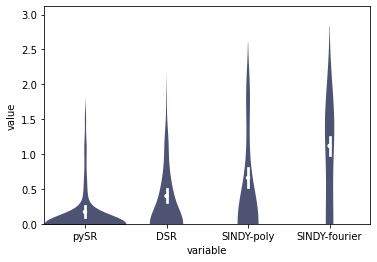

In [92]:


data_long = pd.melt(data_flip, value_vars=model_names)
ax = sns.violinplot(data=data_long,  x="variable", y="value",  
              linewidth=0, size=3, alpha=0.1, split=True, 
                    width=1,
                    order=model_names,
                    scale="area", inner=None, 
                    color=[71/255., 78/255., 123/255.],
                   )

data_long = pd.melt(data, value_vars=model_names)
ax = sns.pointplot(data=data_long, x="variable", y="value", 
                   order=model_names,
              linewidth=0, 
                   size=0.1, 
                   scale = 0.5,
                   palette={ "w"}, 
                   join=False, ci=99)

plt.ylim([0, None])

dg.fixed_aspect_ratio(1/1.5)

# dg.better_savefig("../private_writing/fig_resources/symbolic_violins.png", dpi=600)

<AxesSubplot:>

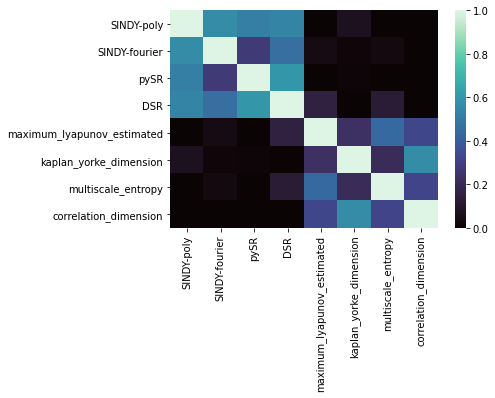

In [82]:


all_properties = dict()
model_names = ["SINDY-poly", "SINDY-fourier", "pySR", "DSR"]
attributes =  ['maximum_lyapunov_estimated', 'kaplan_yorke_dimension', 'multiscale_entropy', 'correlation_dimension']
for equation_name in data.index:
    eq = getattr(dysts.flows, equation_name)()
    attr_vals = [getattr(eq, item, None) for item in attributes]
    
    all_properties[equation_name] = dict(zip(attributes, attr_vals))
all_properties = pd.DataFrame(all_properties).transpose()

data_aug = pd.merge(data, all_properties, how="outer", left_index=True, right_index=True)

#     try:
        
#         for model_name in data[equation_name]:
#             if data[equation_name][model_name] is None:
#                 data[equation_name][model_name] = np.nan
#         all_vals.append((data[equation_name]['SINDY-poly'], data[equation_name]['SINDY-fourier'], data[equation_name]['pySR'], data[equation_name]['DSR']))

        
#         for attribute_name in attributes:
#         all_properties.append(eq.multiscale_entropy)

#     except:
#         pass

# all_vals = np.array(all_vals)

sns.heatmap(data_aug[model_names + attributes].corr(method="spearman"), vmin=0, vmax=1, cmap="mako")

# dg.fixed_aspect_ratio(1)

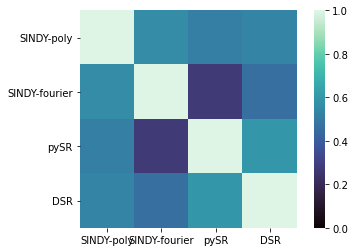

In [87]:
import seaborn as sns

ax = sns.heatmap(data[model_names].corr(method="spearman"), cmap="mako", vmin=0, vmax=1)

ax.set_aspect('equal')

# dg.better_savefig("../private_writing/fig_resources/symbolic_corr.png", dpi=600)

In [67]:
all_lowest_scores = np.nanmin(all_vals, axis=1)

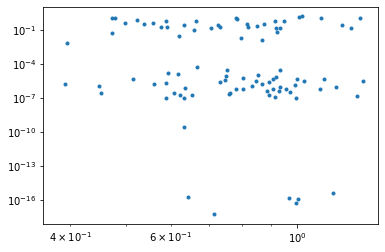

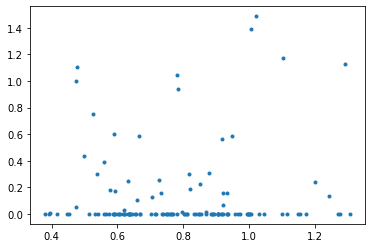

In [69]:
all_lowest_scores = all_vals[:, 2]
all_lowest_scores = np.nanmin(all_vals, axis=1)

plt.figure()
plt.loglog(all_properties, all_lowest_scores, '.')

plt.figure()
plt.plot(all_properties, all_lowest_scores, '.')

In [18]:
all_lowest_scores = np.min(all_vals, axis=1)



np.array(list(data.keys()))[np.argsort(all_lowest_scores)]

array(['SprottO', 'SprottN', 'Colpitts', 'SprottMore', 'ScrollDelay',
       'ShimizuMorioka', 'SprottA', 'SprottJerk', 'SprottC', 'SprottJ',
       'SprottH', 'ForcedVanDerPol', 'SprottF', 'SprottE', 'SprottDelay',
       'HyperLu', 'HyperLorenz', 'SprottI', 'SprottP', 'SprottB',
       'ItikBanksTumor', 'NewtonLiepnik', 'Arneodo', 'VallisElNino',
       'MooreSpiegel', 'MackeyGlass', 'ChenLee', 'RikitakeDynamo',
       'Laser', 'SprottR', 'LuChen', 'HastingsPowell', 'SprottD',
       'SaltonSea', 'KawczynskiStrizhak', 'RayleighBenard', 'Rossler',
       'LiuChen', 'SprottG', 'SprottQ', 'HyperRossler', 'WangSun',
       'HyperQi', 'ArnoldBeltramiChildress', 'PanXuZhou', 'Hopfield',
       'Chen', 'CellularNeuralNetwork', 'Rucklidge', 'Bouali',
       'AnishchenkoAstakhov', 'HyperYan', 'HyperYangChen',
       'PiecewiseCircuit', 'HyperWang', 'StickSlipOscillator', 'Tsucs2',
       'ExcitableCell', 'SprottS', 'OscillatingFlow', 'HyperJha',
       'SprottM', 'WindmiReduced', 'LorenzBound

In [164]:
np.max(data_long["value"])

2.0

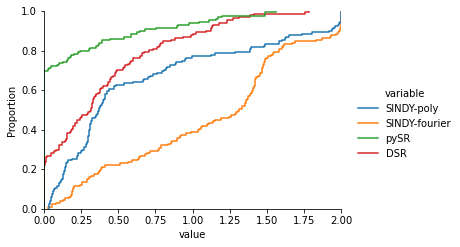

In [192]:
data_long = pd.melt(data, value_vars=model_names)
# sns.displot(data_long, x="value", hue="variable", multiple="stack", kind="kde")
# sns.displot(data_long, x="value", hue="variable", kind="kde", fill=True)
sns.displot(data_long, x="value", hue="variable", kind="ecdf")
plt.xlim([-1e-8, 2])

dg.fixed_aspect_ratio(1/1.5)

/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

<AxesSubplot:xlabel='variable', ylabel='value'>

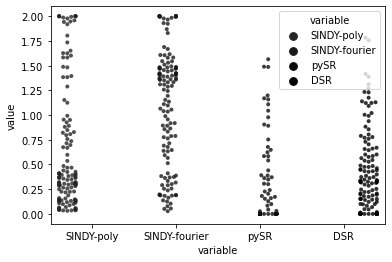

In [201]:
sns.set_style()
sns.swarmplot(data=data_long,  y="value", x="variable", hue="variable", 
              dodge=True, linewidth=0, size=4, alpha=0.8, color='k')

## Plot easiest, hardest, and median attractors

In [79]:
sorted_medscores = data_reduced.median(axis=1).sort_values()
print(sorted_medscores.index[0])
print(sorted_medscores.index[len(sorted_medscores) // 2])
print(sorted_medscores.index[-1])

GenesioTesi
YuWang2
Torus


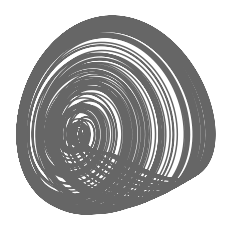

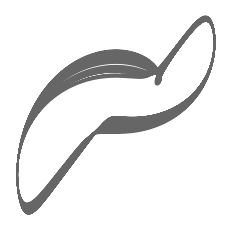

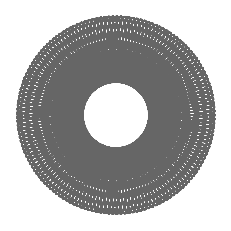

In [80]:
from dysts.flows import GenesioTesi, YuWang2, Torus

style1 = {"color": (0.4, 0.4, 0.4)}

plt.figure()
sol = GenesioTesi().make_trajectory(50000, resample=True, pts_per_period=400)
plt.plot(sol[:, 0], sol[:, 1], **style1)
dg.fixed_aspect_ratio(1)
dg.vanish_axes()
# dg.better_savefig("../private_writing/fig_resources/sprott_torus.png", dpi=600)


plt.figure()
sol = YuWang2().make_trajectory(50000, resample=True, pts_per_period=400)
plt.plot(sol[:, 0], sol[:, 1], **style1)
dg.fixed_aspect_ratio(1)
dg.vanish_axes()
# dg.better_savefig("../private_writing/fig_resources/stickslip.png", dpi=600)


plt.figure()
sol = Torus().make_trajectory(50000, resample=True, pts_per_period=400)
plt.plot(sol[:, 0], sol[:, 1], **style1)
dg.fixed_aspect_ratio(1)
dg.vanish_axes()
# dg.better_savefig("../private_writing/fig_resources/torus.png", dpi=600)

### Correlate forecast ability with symbolic scores

In [133]:
import os
import json
with open(os.getcwd() + "/results/results_test_univariate__pts_per_period_100__periods_12.json", "r") as file:
    all_results = json.load(file)

all_best_results = dict()
for equation_name in all_results:
    all_results[equation_name].keys()
    
    all_smape_values = list()
    for model_name in all_results[equation_name].keys():
        if model_name == "values":
            continue
        all_smape_values.append(all_results[equation_name][model_name]['smape'])
        
    all_best_results[equation_name] = np.min(all_smape_values)

In [138]:
symb_series, forecast_series = pd.DataFrame(data_reduced.min(axis=1)), pd.DataFrame(pd.Series(all_best_results))

cross_corr = pd.concat([symb_series, forecast_series], axis=1, 
                       keys=['symb_series', 'forecast_series']).corr(method="spearman").loc["symb_series", 'forecast_series']
print(cross_corr)
math_sort_inds = np.argsort(np.max(cross_corr, axis=0))[::-1]

# ax = sns.heatmap(cross_corr.transpose().iloc[math_sort_inds, metric_sort_inds], cmap="mako", vmin=0, vmax=1)
# ax.set_aspect(1)
# ax.tick_params(axis='both', which='both', length=0)

          0
0 -0.164494


          0
0 -0.164494


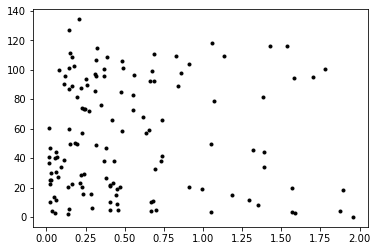

In [135]:
plt.plot(data_reduced.median(axis=1), pd.Series(all_best_results), '.k')

In [108]:
forecast_series

,0
Aizawa,134.961498
AnishchenkoAstakhov,119.642526
Arneodo,58.845657
ArnoldBeltramiChildress,129.217357
ArnoldWeb,6.428730
...,...
WangSun,162.555050
WindmiReduced,15.055536
YuWang,121.252536
YuWang2,157.191803


## Make training data

In [ ]:
import sys
import json
import os
import numpy as np


from dysts.base import get_attractor_list
from dysts.analysis import sample_initial_conditions
import dysts.flows

n_train = 150

all_train_test = dict()
for i, equation_name in enumerate(get_attractor_list()):
    
    all_train_test[equation_name] = dict()
    model = getattr(dysts.flows, equation_name)()
    
    np.random.seed(0)
    ic_train, ic_test = sample_initial_conditions(model, 2, traj_length=1000, pts_per_period=30)
    
    model.ic = ic_train
    tvals, sol = model.make_trajectory(n_train, pts_per_period=15, resample=True, return_times=True, standardize=False)
    dt = np.median(np.diff(tvals))
    dsol = np.vstack([model.rhs(val, 0) for val in sol])# * dt
    X_train, y_train = sol, dsol
    t_train = tvals

    model.ic = ic_test
    tvals, sol = model.make_trajectory(n_train, pts_per_period=15, resample=True, return_times=True, standardize=False)
    dt = np.median(np.diff(tvals))
    dsol = np.vstack([model.rhs(val, 0) for val in sol])# * dt
    X_test, y_test = sol, dsol
    t_test = tvals
    
    all_train_test[equation_name]["X_train"] = X_train.tolist()
    all_train_test[equation_name]["X_test"] = X_test.tolist()
    all_train_test[equation_name]["y_train"] = y_train.tolist()
    all_train_test[equation_name]["y_test"] = y_test.tolist()
    all_train_test[equation_name]["t_train"] = t_train.tolist()
    all_train_test[equation_name]["t_test"] = t_test.tolist()
    
    np.any(np.isnan(X_test)) or np.any(np.isnan(X_train))
    
# with open("./resources/symb_train_test_data.json", 'w') as file:
#     json.dump(all_train_test, file, indent=4)

In [ ]:
pip install pysr


# Learn equations
equations = pysr(
    X,
    y,
    niterations=5,
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",  # Pre-defined library of operators (see docs)
        "inv(x) = 1/x",  # Define your own operator! (Julia syntax)
    ],
)

In [4]:
help(model.fit)

Help on method fit in module dsr.task.regression.sklearn:

fit(X, y) method of dsr.task.regression.sklearn.DeepSymbolicRegressor instance



## Symbolic regression

Available benchmarks

+ Eureqa Python API (could not get this to work)
+ PySR
+ pySINDY
+ AI Feynman 2.0
+ Wolfram (only works on univariate problems)

In [67]:
help(pysr)

Help on function pysr in module pysr.sr:

pysr(X, y, weights=None, binary_operators=None, unary_operators=None, procs=4, loss='L2DistLoss()', populations=20, niterations=100, ncyclesperiteration=300, alpha=0.1, annealing=False, fractionReplaced=0.1, fractionReplacedHof=0.1, npop=1000, parsimony=0.0001, migration=True, hofMigration=True, shouldOptimizeConstants=True, topn=10, weightAddNode=1, weightInsertNode=3, weightDeleteNode=3, weightDoNothing=1, weightMutateConstant=10, weightMutateOperator=1, weightRandomize=1, weightSimplify=0.01, perturbationFactor=1.0, timeout=None, extra_sympy_mappings=None, extra_torch_mappings=None, extra_jax_mappings=None, equation_file=None, verbosity=1000000000.0, progress=None, maxsize=20, fast_cycle=False, maxdepth=None, variable_names=None, batching=False, batchSize=50, select_k_features=None, warmupMaxsizeBy=0.0, constraints=None, useFrequency=True, tempdir=None, delete_tempfiles=True, julia_optimization=3, julia_project=None, user_input=True, update=

In [68]:
?pysr

Signature:
pysr(
    X,
    y,
    weights=None,
    binary_operators=None,
    unary_operators=None,
    procs=4,
    loss='L2DistLoss()',
    populations=20,
    niterations=100,
    ncyclesperiteration=300,
    alpha=0.1,
    annealing=False,
    fractionReplaced=0.1,
    fractionReplacedHof=0.1,
    npop=1000,
    parsimony=0.0001,
    migration=True,
    hofMigration=True,
    shouldOptimizeConstants=True,
    topn=10,
    weightAddNode=1,
    weightInsertNode=3,
    weightDeleteNode=3,
    weightDoNothing=1,
    weightMutateConstant=10,
    weightMutateOperator=1,
    weightRandomize=1,
    weightSimplify=0.01,
    perturbationFactor=1.0,
    timeout=None,
    extra_sympy_mappings=None,
    extra_torch_mappings=None,
    extra_jax_mappings=None,
    equation_file=None,
    verbosity=1000000000.0,
    progress=None,
    maxsize=20,
    fast_cycle=False,
    maxdepth=None,
    variable_names=None,
    batching=False,
    batchSize=50,
    select_k_features=None,
    warmupMaxsizeBy

In [ ]:
ADD SORT KEYS TO CLUSTER PY FILE

In [3]:
# get data

import json
with open("./results/symbolic_scores_sweep.json", "r") as file:
    results_symb = json.load(file)

In [6]:
# with open("./results/symbolic_scores_sweep.json", "r") as file:
#     results_symb = json.load(file)
#     json.dump("./results/symbolic_scores_sweep.json", sort_keys=True)
    
# with open("./results/symbolic_scores_sweep.json", 'w') as f:
#     json.dump(results_symb, f, indent=4, sort_keys=True)

In [57]:
# Dataset
X = 2 * np.random.randn(100, 5)
y = 2 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 2

# Learn equations
equations = pysr(
    X,
    y,
    niterations=5,
    binary_operators=["+", "*"],
    delete_tempfiles=True,
    verbosity=0,
    multithreading=False,
    unary_operators=[
        "cos",
        "exp",
        "sin",  # Pre-defined library of operators (see docs)
        "log",
        "tanh",
        "inv(x) = 1/x",  # Define your own operator! (Julia syntax)
    ],
)

# ...# (you can use ctl-c to exit early)

print(best(equations))

Killing process... will return when done.
x0**2


In [47]:
dd = dict()

dd.update({"tt" : 7})

In [48]:
dd

{'tt': 7}

In [18]:
X_train.shape

(150, 3)

In [19]:
y_train.shape

(150, 3)

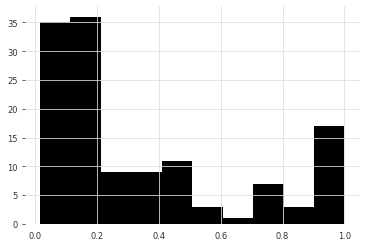

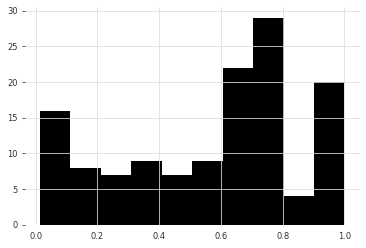

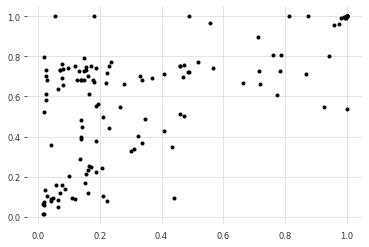

In [60]:
score_vals = np.array([(sym_scores[item]["SINDY-poly"], sym_scores[item]["SINDY-fourier"]) for item in sym_scores])

plt.figure()
plt.hist(score_vals[:, 0])

plt.figure()
plt.hist(score_vals[:, 1])

plt.figure()
plt.plot(*score_vals.T, '.');

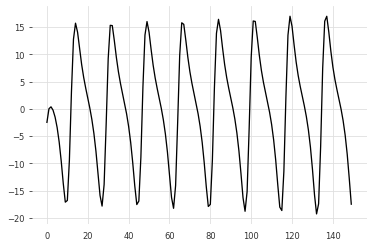

In [75]:
plt.plot(y_train[:, 1])

In [43]:
from pysr import pysr, best_callable

operator_list = [
            "cos",
            "exp",
            "sin",
            "log",
            "tanh",
            "inv(x) = 1/x",
        ]
# base operators +, −, ×, ÷,sin, cos, exp, log, x
pysr_opts = {
    "populations" : 3,  # number of workers, defaults to 20
    "niterations" : 5,
    "procs": 1, # number of threads
    "delete_tempfiles" : True,
    "verbosity": 0,
    "unary_operators" : operator_list,
    "binary_operators" : ["+", "*", "÷", "-"]
}

models = pysr(
    X_train[:10],
    y_train[:10, i],
    **pysr_opts
)
# print(best(equations))

y_test_pred = best_callable(models)(X_test)
# plt.plot(best_callable(equations)(y_test))


In [39]:
# try 100 points

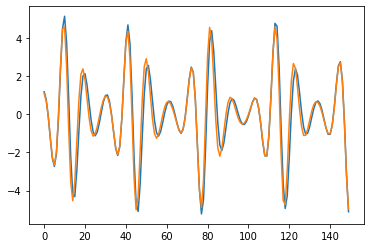

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(best_callable(equations)(X_test))
plt.plot(y_test[:, i])

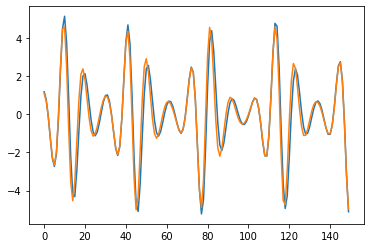

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(best_callable(equations)(X_test))
plt.plot(y_test[:, i])

In [29]:
equations[equations.score == equations.score.max()]["lambda_format"]

3    PySRFunction(X=>x0 - 3.5865989*x1)
Name: lambda_format, dtype: object

In [25]:
equations["score"]

0    0.000000
1    1.236611
2    0.037664
3    4.657180
4    0.082358
5    0.396391
6    0.006367
7    0.017575
Name: score, dtype: float64

In [23]:
equations#.lambda_format

,Complexity,MSE,score,Equation,sympy_format,lambda_format
0,1,2.714743,0.000000,0.18005764,0.180057640000000,PySRFunction(X=>0.180057640000000)
1,3,0.228887,1.236611,(x1 * -3.2937198),-3.2937198*x1,PySRFunction(X=>-3.2937198*x1)
2,4,0.220427,0.037664,(sin(x1) * -3.5874171),-3.5874171*sin(x1),PySRFunction(X=>-3.5874171*sin(x1))
3,5,0.002093,4.657180,((x1 * -3.5865989) + x0),x0 - 3.5865989*x1,PySRFunction(X=>x0 - 3.5865989*x1)
4,6,0.001927,0.082358,((x1 * -3.5550137) + sin(x0)),-3.5550137*x1 + sin(x0),PySRFunction(X=>-3.5550137*x1 + sin(x0))
5,7,0.001296,0.396391,(((x1 * -3.5874171) + -0.028219834) + x0),x0 - 3.5874171*x1 - 0.028219834,PySRFunction(X=>x0 - 3.5874171*x1 - 0.028219834)
6,12,0.001256,0.006367,(inv(inv(x1) * -0.24654017) + ((tanh(x1) * 0.5...,x0 + inv(-0.24654017*inv(x1)) + 0.55652875*tan...,PySRFunction(X=>x0 + inv(-0.24654017*inv(x1)) ...
7,13,0.001234,0.017575,(inv(inv(x1) * -0.24564007) + ((sin(sin(x1)) *...,x0 + inv(-0.24564007*inv(x1)) + 0.5780935*sin(...,PySRFunction(X=>x0 + inv(-0.24564007*inv(x1)) ...


## nODEs

In [4]:
y_train.shape

(150, 3)